In [1]:
from glob import glob
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import sys
sys.path.append('../')
from source_names_dict import source_names_readable, source_distances_mpc, get_simbad_name_glob
corr = __import__('11_corr')
from process_corr import load_df_fit_values, load_df_fit_samples
from uvot import filter_colors
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.colors as mcolors
from scipy.stats import pearsonr

In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
tab = Table.read('../lightcurves/joined/NAME_NGC_7793_P13,U,curve_nosys_join.fits')
subsets = corr.calc_subsets(tab)
tab_no_UL_no_bad = subsets['tab_no_UL_no_bad']

x     = tab_no_UL_no_bad['Rate'].value
x_err = (tab_no_UL_no_bad['Ratepos'] - tab_no_UL_no_bad['Rateneg']).value
y     = tab_no_UL_no_bad['COI_SRC_RATE'].value
y_err = tab_no_UL_no_bad['COI_SRC_RATE_ERR'].value

In [4]:
Ndatas = np.arange(len(tab_no_UL_no_bad), 0, -10)
Ndatas
cmap = plt.cm.cool(Ndatas/max(Ndatas))

161
152
143
133
123
113
104
94
84
76
68
59
49
40
31
23
15
7


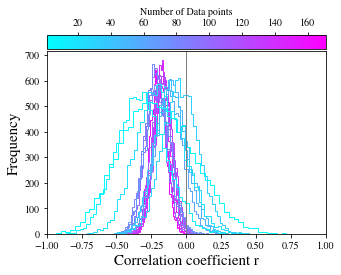

In [5]:
plt.figure(figsize=(5,4), facecolor='white')
i = 0
while len(x) > 12:
    r = np.random.randint(len(x), size=10) # index to remove
    x = np.delete(x, r)
    x_err = np.delete(x_err, r)
    y = np.delete(y, r)
    y_err = np.delete(y_err, r)
    
    x_samp = np.random.normal(loc=x, scale=x_err, size=(10000,len(x)))
    y_samp = np.random.normal(loc=y, scale=y_err, size=(10000,len(y)))
    r_vals = [pearsonr(x_samp[i], y_samp[i])[0] for i in range(10000)]

    plt.hist(r_vals, bins=50, histtype='step', color=cmap[i])
    print(len(x))
    i+=1
plt.xlim(-1,1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(vmin=min(Ndatas), vmax=max(Ndatas)))
plt.colorbar(sm, location='top', label=r'Number of Data points', pad=0.01)
plt.xlabel('Correlation coefficient r', size=15)
plt.ylabel('Frequency', size=15)
plt.axvline(0, color='grey', lw=1.0)
plt.savefig('../figures/removing_datapoints_r.png', bbox_inches='tight')
plt.savefig('../figures/removing_datapoints_r.pdf', bbox_inches='tight')
plt.show()